In [7]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import random_unitary
from qreservoirpy import QReservoir, Layers, utilities
from reservoirpy.nodes import Reservoir

Running Reservoir-1:   0%|          | 0/1000 [00:00<?, ?it/s]

Running Reservoir-1: 100%|██████████| 1000/1000 [00:00<00:00, 11106.97it/s]


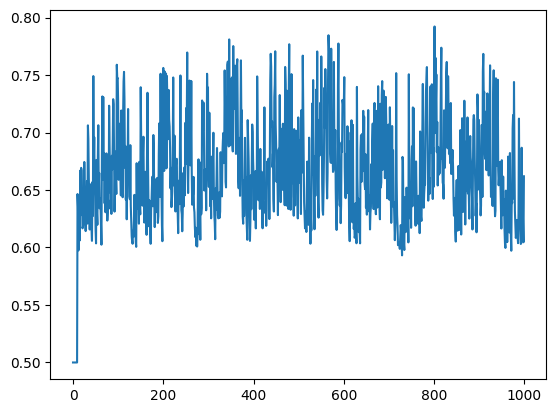

In [8]:
def build_method(circ, timestep, operator):
    circ.initialize(np.array([np.sqrt(timestep),
        np.sqrt(1-timestep)], dtype=complex
    ), 0)
    circ.unitary(operator, circ.qubits)
    return circ

qres = QReservoir(qubits=4, layers=[
    Layers.Reset(),
    Layers.Timeseries(build_method=build_method, incrementally=True, M=10),
    Layers.Measurement(range(4))
], operator=random_unitary(2**4), analyze_function=lambda res: res[-4:])


timeseries = utilities.NARMA(10, 1000).reshape((-1, 1))



res = Reservoir(50, lr=1, sr=0.9)
states = res.run(timeseries)
# states = res.run(timeseries, shots=10000, transpile=True)
plt.plot(timeseries)



In [9]:
WARMUP = 0.2
# utilities.result_plotter(states, np.round(timeseries, 1), WARMUP)

<Figure size 640x480 with 0 Axes>

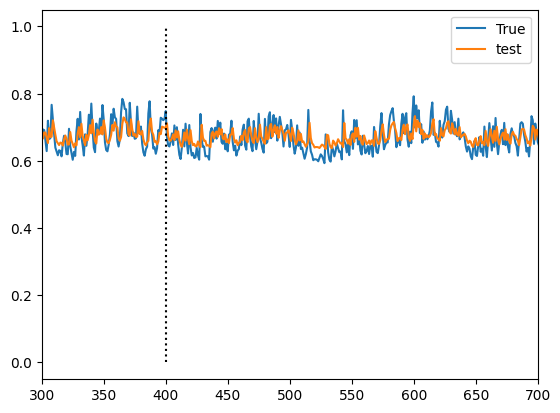

In [10]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



warmup = int(len(states) * WARMUP)
x = timeseries[:-1]
target = timeseries[1:]
# target = target - np.mean(target)


x = x[warmup:]
target = target[warmup:]

# train_x, test_x, train_y, test_y = train_test_split(x, target, test_size=0.33)
M = len(x)
train_x = x[:M//2]
train_y = target[:M//2]

test_x = x[M//2:]
test_y = target[M//2:]
plt.figure()

model = make_pipeline(StandardScaler(), Ridge(alpha=10))
model.fit(train_x, train_y)


SCORE_WITHOUT = utilities.NMSE(model.predict(test_x), test_y)
# print(f'Score: {SCORE_WITHOUT}')
# print(model.score(test_x, test_y))
# plt.plot(alpha_space, scores)
plt.figure()
plt.plot(target , label="True")
plt.plot(model.predict(x), label="test")
plt.vlines(len(test_x), 0, 1, linestyles='dotted', colors='k')
window = 100
plt.xlim([len(test_x) - window, len(test_x) + 3* window])
plt.legend()
plt.show()

0.31737830712373183


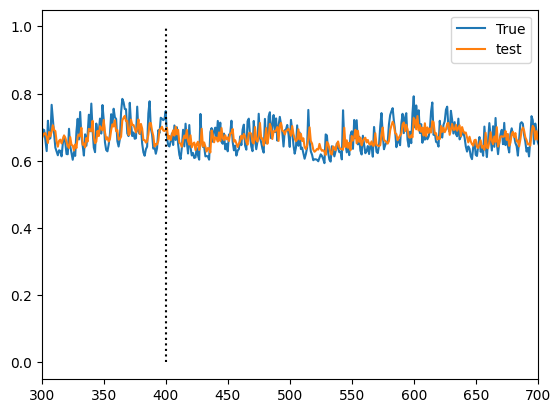

In [11]:

warmup = int(len(states) * WARMUP)
x = states[:-1]
target = timeseries[1:]
# target = target - np.mean(target)


x = x[warmup:]
target = target[warmup:]

# train_x, test_x, train_y, test_y = train_test_split(x, target, test_size=0.33)
M = len(x)
train_x = x[:M//2]
train_y = target[:M//2]

test_x = x[M//2:]
test_y = target[M//2:]

model = make_pipeline(StandardScaler(), Ridge(alpha=100))
model.fit(train_x, train_y)
print(model.score(test_x, test_y))
# plt.plot(alpha_space, scores)
SCORE_WITH = utilities.NMSE(model.predict(test_x), test_y)


plt.figure()
plt.plot(target , label="True")
plt.plot(model.predict(x), label="test")
plt.vlines(len(test_x), 0, 1, linestyles='dotted', colors='k')
window = 100
plt.xlim([len(test_x) - window, len(test_x) + 3* window])
plt.legend()
plt.show()

In [12]:
quantumStates = qres.run(timeseries.ravel(), shots=10000)

100%|██████████| 1000/1000 [16:40<00:00,  1.00s/it]


0.10154963118449845


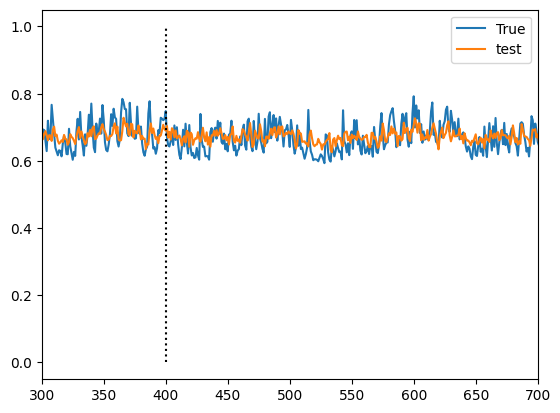

In [13]:

warmup = int(len(states) * WARMUP)
x = quantumStates[:-1]
target = timeseries[1:]
# target = target - np.mean(target)


x = x[warmup:]
target = target[warmup:]

# train_x, test_x, train_y, test_y = train_test_split(x, target, test_size=0.33)
M = len(x)
train_x = x[:M//2]
train_y = target[:M//2]

test_x = x[M//2:]
test_y = target[M//2:]

model = make_pipeline(StandardScaler(), Ridge(alpha=10))
model.fit(train_x, train_y)
print(model.score(test_x, test_y))
# plt.plot(alpha_space, scores)

plt.figure()
plt.plot(target , label="True")
plt.plot(model.predict(x), label="test")
plt.vlines(len(test_x), 0, 1, linestyles='dotted', colors='k')
window = 100
plt.xlim([len(test_x) - window, len(test_x) + 3* window])
plt.legend()
plt.show()